In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf
import tensorflow_datasets as tfds

%matplotlib inline

C:\Users\HP\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = 'C:\\Users\\HP\\tensorflow_datasets\\downloads'

In [3]:
dataset, info = tfds.load(name='fashion_mnist', with_info=True, data_dir=data_dir)

train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
train_dataset

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [6]:
info.features['label'].names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_labels = info.features['label'].names
print('Class names:',class_labels)

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
info.splits['train'].num_examples

60000

In [9]:
num_train = info.splits['train'].num_examples
num_test = info.splits['test'].num_examples
print('number of train:',num_train)
print('number of test:',num_test)

number of train: 60000
number of test: 10000


In [10]:
image = train_dataset.element_spec['image']

In [11]:
image

TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None)

In [12]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [13]:
def normalize_1(element):
    images, labels = element['image'], element['label']
    images = tf.cast(images, tf.float32)
    images /= 255
    return images,labels

In [14]:
train_dataset.map(normalize_1)

<MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

### Normalize

In [15]:
train_dataset_normalized = train_dataset.map(normalize_1)
test_dataset_normalized = test_dataset.map(normalize_1)

### Cache 

In [16]:
# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster

train_dataset_cached = train_dataset_normalized.cache()
test_dataset_cached = test_dataset_normalized.cache()

### Explore Processed Data

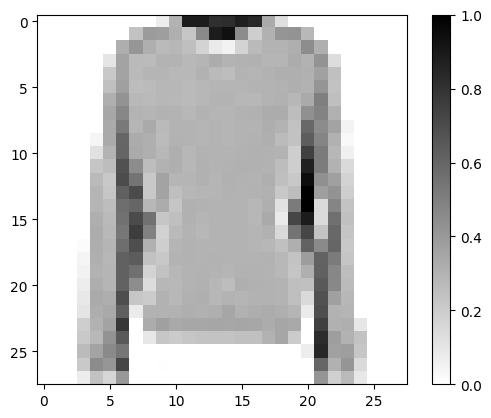

In [17]:
# Plot an image from
for image,label in train_dataset_cached.take(1):
    image = image.numpy().reshape(28,28)

plt.figure()
plt.imshow(image, cmap='binary')
plt.colorbar()
plt.grid(False)
plt.show()

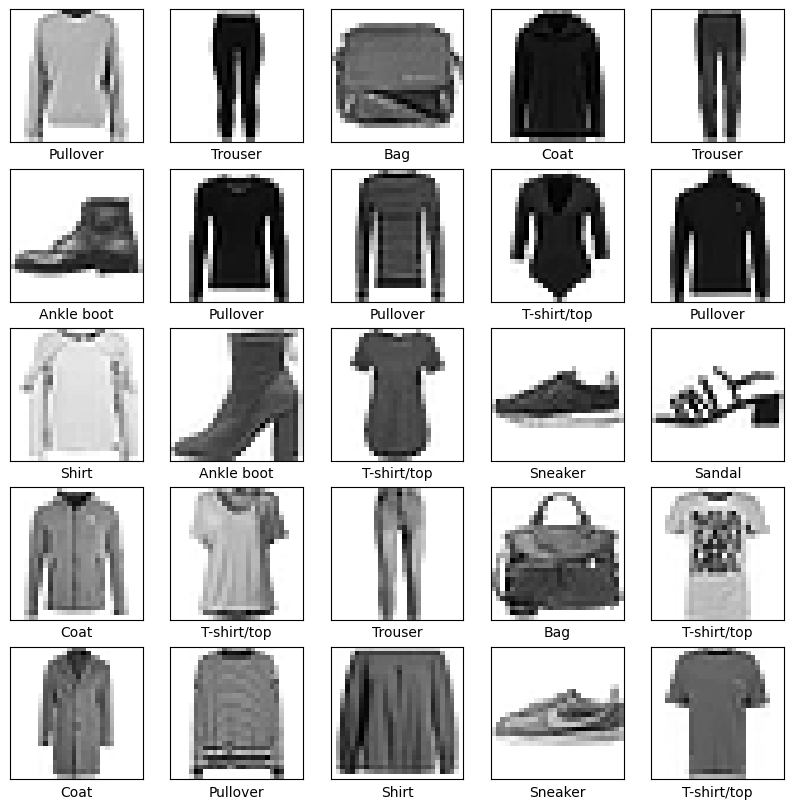

In [18]:
# Display the first 25 images from the training set and display the class name below each image. 
# Verify that the data is in the correct format and we're ready to build and train the network.

plt.figure(figsize=[10,10])
for i,j in enumerate(train_dataset_cached.take(25)):
    image = j[0].numpy().reshape(28,28)
    plt.subplot(5,5,i+1)
    plt.imshow(image,cmap='binary')
    plt.xticks([])
    plt.yticks([])
    label = j[1].numpy()
    plt.xlabel(class_labels[label])

### Build the Model

In [19]:
tf.keras.backend.clear_session()

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [22]:
batch_size = 32
train_prep = train_dataset_cached.cache().repeat().shuffle(num_train).batch(batch_size)
test_prep = test_dataset_cached.cache().batch(batch_size)

### Fit the Model

In [23]:
model.fit(train_prep, epochs=10, steps_per_epoch=math.ceil(num_train / batch_size))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4996 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3734 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3329 - accuracy: 0.8787
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3106 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2888 - accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2675 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2518 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2447 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

### Evaluate the Model

In [26]:
model.evaluate(test_prep, steps=math.ceil(num_test/batch_size))

313/313 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8899


[0.325982004404068, 0.8899000287055969]

In [27]:
test_loss, test_accuracy = model.evaluate(test_prep, steps=math.ceil(num_test/batch_size))

313/313 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8899


In [29]:
print('Accuracy on test:',test_accuracy)

Accuracy on test: 0.8899000287055969


### Predictions

In [31]:
for test_images, test_labels in test_prep.take(1):
    pred = model.predict(test_images)

1/1 [==============================] - 0s 16ms/step


In [51]:
pred.shape,len(pred),np.argmax(pred[0]),test_labels.numpy()[0]

((32, 10), 32, 4, 4)

In [52]:
test_images

<tf.Tensor: shape=(32, 28, 28, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
     

In [53]:
test_labels

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([4, 4, 9, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 2, 2, 0, 4,
       4, 4, 2, 7, 7, 4, 2, 4, 7, 5], dtype=int64)>

### Plotting

In [46]:
def plot_image(i, predictions_array, true_labels, images):
  """
  Plots an image with its corresponding predictions and labels.

  Args:
    i: The index of the image to plot.
    predictions_array: An array of predictions for the image.
    true_labels: An array of true labels for the image.
    images: An array of images.
  """

  # Get the image, prediction, and true label for the given index.
  img = images[i]
  pred = predictions_array[i]
  true_label = true_labels[i]

  # Set the plot grid to false, hide the x and y ticks, and display the image.
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[..., 0], cmap=plt.cm.binary)

  # Get the predicted label for the image.
  predicted_label = np.argmax(pred)

  # If the predicted label is the same as the true label, set the color of the x-label to blue. Otherwise, set the color to red.
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  # Set the x-label.
  plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label],
                                    100 * np.max(pred),
                                    class_labels[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
  """
  Plots a bar plot of the predictions for an image, with the true label highlighted.

  Args:
    i: The index of the image to plot.
    predictions_array: An array of predictions for the image.
    true_label: The true label for the image.
  """

  # Get the prediction and true label for the given index.
  pred = predictions_array[i]
  true_label = true_label[i]

  # Set the plot grid to false, hide the x and y ticks, and create a bar plot of the predictions.
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), pred, color="#777777")

  # Set the y-limits of the plot to [0, 1].
  plt.ylim([0, 1])

  # Get the predicted label for the image.
  predicted_label = np.argmax(pred)

  # Set the color of the corresponding bar to red.
  thisplot[predicted_label].set_color('red')

  # Set the color of the bar for the true label to blue.
  thisplot[true_label].set_color('blue')

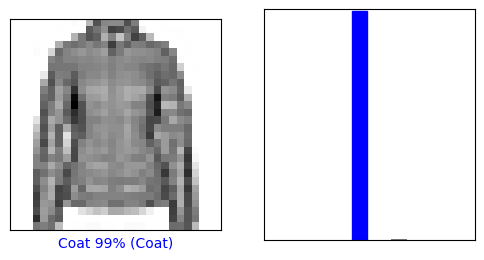

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)

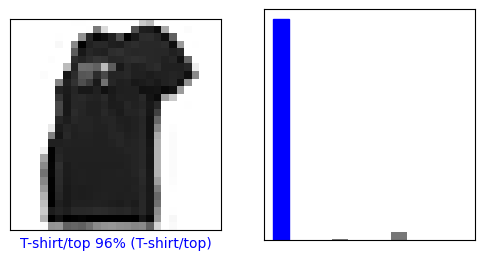

In [54]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)

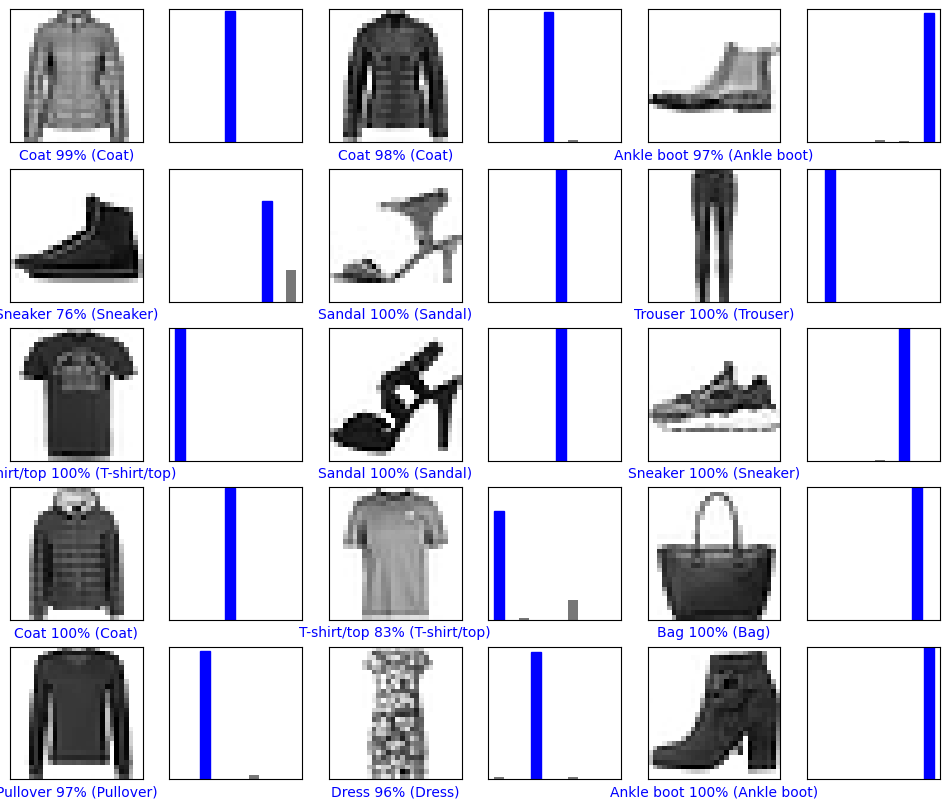

In [58]:
 # Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)


#### Plot the class probabilities of a single image

In [76]:
# Pick a single image from the test images
img = test_images[0].numpy()
img.shape

(28, 28, 1)

In [77]:
# make the image the only member of a batch
img = np.array([img])
img.shape

(1, 28, 28, 1)

In [78]:
# now predict the image

img_pred = model.predict(img)
img_pred

1/1 [==============================] - 0s 20ms/step


array([[4.1149951e-06, 1.0437864e-07, 3.1115341e-03, 1.1455526e-08,
        9.9187768e-01, 6.6323630e-10, 5.0048293e-03, 4.3884486e-11,
        1.7436354e-06, 4.4182366e-12]], dtype=float32)

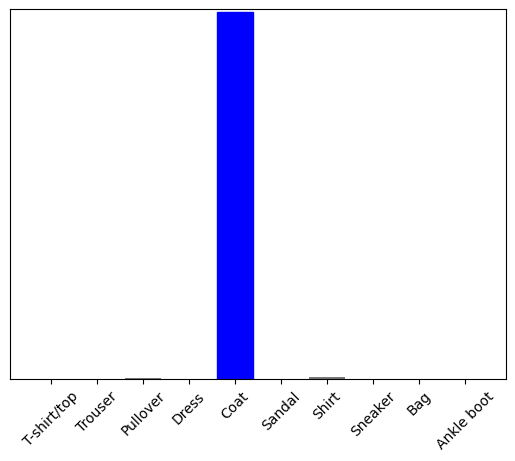

In [85]:
plot_value_array(0,img_pred,test_labels)
plt.xticks(ticks=np.arange(10),labels=class_labels,rotation=45)
plt.show()

In [86]:
np.argmax(img_pred)

4

In [81]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']